In [1]:
import uproot 
import numpy as np
import coffea
from coffea.nanoaod import NanoEvents
from coffea.nanoaod.methods.leptons import *
from coffea import hist

In [2]:
#fname = "/uscms/home/dlehner/nobackup/analysis/data/nanoAOD.root"
#fname="/uscms/home/therwig/nobackup/public/forDominic/CRAB3_sos_28may2020_testHinoProd_nano.root"
events = NanoEvents.from_file(fname,methods={"ElectronBPark":Electron})
events2 = NanoEvents.from_file(fname)

In [2]:
fname="/uscms/home/ahall/nobackup/public/forTamas/iDM_nanoaod.root"
events = NanoEvents.from_file(fname,methods={"ElectronBPark":Electron})


In [3]:
print(events.GenPart.columns)

['eta', 'mass', 'phi', 'pt', 'pdgId', 'status', 'statusFlags', 'parent', 'children']


In [8]:
print(events.GenPart[abs(events.GenPart.pdgId == 11) & events.GenPart.hasFlags(['fromHardProcess', 'isFirstCopy'])].parent.pdgId)

[[1000023] [1000023] [1000023] ... [1000023] [1000023] [1000023]]


In [56]:
histo = hist.Hist(
            "Events",
            hist.Bin("ele_pt", "electron pt", 20, 0, 20),
        )
genEleMask = (abs(events.GenPart.pdgId) == 11) & events.GenPart.hasFlags(['fromHardProcess', 'isFirstCopy']) & (events.GenPart.parent.pdgId ==1000023)
histo.fill(ele_pt=events.GenPart[genEleMask].pt.flatten())

[[1.4220884] [0.63446975] [0.5027895] ... [0.42391363] [0.5101658] [0.1421494]]


/uscms/home/ahall/nobackup/LPC-DM/SIDM/anaconda3/envs/FireHydrant/lib/python3.8/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


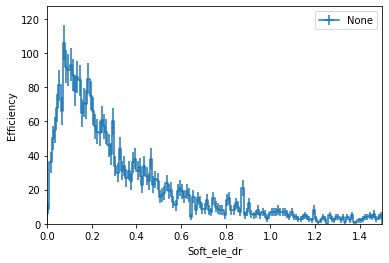

In [64]:
histo_dr = hist.Hist(
            "Efficiency",
            hist.Bin("soft_ele", "Soft_ele_dr", 150, 0, 1.5),
        )
genEles = events.GenPart[genEleMask]
genEle_pairs = genEles.distincts(nested=True)
dR = genEle_pairs.i0.delta_r(genEle_pairs.i1).min()
print(dR)
histo_dr.fill(soft_ele=dR.flatten())
hist.plot1d(histo_dr)

In [113]:
print(events.GenPart[genEleMask].parent.pdgId)

[[1000023 1000023] [1000023 1000023] [1000023 1000023] ... [1000023 1000023] [1000023 1000023] [1000023 1000023]]


In [39]:
#print(events.GenPart[events.GenPart.parent.pdgId ==32 & events.GenPart.hasFlags(['fromHardProcess'])].pdgId)
print(events.GenPart[events.GenPart.pdgId == 32].mass)

[[30.0 30.0] [30.0 30.0] [30.0 30.0] ... [30.0 30.0] [30.0 30.0] [30.0 30.0]]


/uscms/home/ahall/nobackup/LPC-DM/SIDM/anaconda3/envs/FireHydrant/lib/python3.8/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


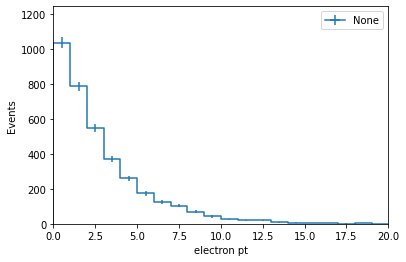

In [17]:
from coffea import hist
%matplotlib inline
hist.plot1d(histo)

In [106]:

def cut_tight(electrons):
    return electrons[
       # (electrons.pt > 1) & (electrons.pt<5)&
         (electrons.mvaId > 5)
    ]



In [102]:
MET_mask = events.MET.pt >120
Jet_mask = events.Jet.pt.max() > 80
MET_Jet_mask = MET_mask & Jet_mask

GenPart_mask = ((abs(events[MET_Jet_mask].GenPart.pdgId) == 11) 
               & (events[MET_Jet_mask].GenPart.parent.pdgId == 1000023) 
               & (events[MET_Jet_mask].GenPart.status == 1) 
               & (events[MET_Jet_mask].GenPart.hasFlags(["fromHardProcess", "isFirstCopy"])))

soft_eles = events[MET_Jet_mask].ElectronBPark
eles = soft_eles.cross(events[MET_Jet_mask].GenPart[GenPart_mask], nested=True)

matched_mask = (eles.i0.delta_r(eles.i1)).min() < 0.005
matched_eles = soft_eles[matched_mask & soft_eles.isPF == False] #&(soft_eles.pt < 5) & (soft_eles.pt >1)]
print(matched_eles)

#matched_eles = electrons that are gen matched within 0.005

[[<ElectronBPark 298> <ElectronBPark 299> <ElectronBPark 300> ... <ElectronBPark 375> <ElectronBPark 376> <ElectronBPark 377>] [<ElectronBPark 562> <ElectronBPark 563> <ElectronBPark 564> ... <ElectronBPark 621> <ElectronBPark 622> <ElectronBPark 623>] [<ElectronBPark 705> <ElectronBPark 706> <ElectronBPark 707> ... <ElectronBPark 822> <ElectronBPark 823> <ElectronBPark 824>] ... [<ElectronBPark 301420> <ElectronBPark 301421> <ElectronBPark 301422> ... <ElectronBPark 301533> <ElectronBPark 301534> <ElectronBPark 301535>] [<ElectronBPark 302230> <ElectronBPark 302231> <ElectronBPark 302232> ... <ElectronBPark 302336> <ElectronBPark 302337> <ElectronBPark 302338>] [<ElectronBPark 302553> <ElectronBPark 302554> <ElectronBPark 302555> ... <ElectronBPark 302606> <ElectronBPark 302607> <ElectronBPark 302608>]]


/uscms/home/ahall/nobackup/LPC-DM/SIDM/anaconda3/envs/FireHydrant/lib/python3.8/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


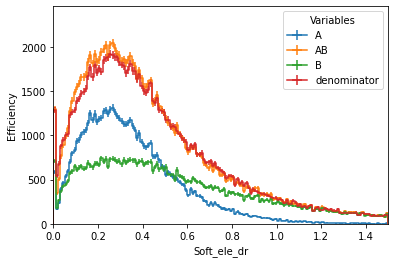

In [119]:
#matched_eles.passPtCut = (matched_eles.pt < 5)&(matched_eles.pt > 1)

matched_pairs = matched_eles.distincts(nested=True)

#print(matched_eles.passPtCut)
#print(type(matched_pairs.i0))
#print(type(matched_eles))
#print(matched_pairs.i0.passPtCut)

matched_pairsA = matched_pairs[(matched_pairs.i0.pt < 5) & (matched_pairs.i0.pt > 1)]
matched_pairsB = matched_pairs[(matched_pairs.i1.pt < 5) & (matched_pairs.i1.pt > 1)]
#matched_pairsB = matched_pairs[matched_pairs.i1.passPtCut]

delta_r = (matched_pairs.i0.delta_r(matched_pairs.i1)).min()
delta_rA = (matched_pairsA.i0.delta_r(matched_pairsA.i1)).min()
delta_rB = (matched_pairsB.i0.delta_r(matched_pairsB.i1)).min()

delta_rAB = np.append(delta_rA.flatten().tolist(), delta_rB.flatten().tolist())


#delta_rAB = delta_rA.join(delta_rB)
#print(delta_r)
#print(matched_eles[matched_eles.counts >2])
#print(matched_eles[matched_eles.counts >2].length)
#delta_r[matched_eles[matched_eles.counts>2].pt <5]

histo_dr_all = hist.Hist(
            "Efficiency",
            hist.Cat("variables", "Variables"),
            hist.Bin("soft_ele", "Soft_ele_dr", 150, 0, 1.5),
        )
histo_dr_all.fill(variables="denominator", soft_ele = delta_r.flatten())
histo_dr_all.fill(variables="A", soft_ele = delta_rA.flatten())
histo_dr_all.fill(variables="B", soft_ele = delta_rB.flatten())
histo_dr_all.fill(variables="AB", soft_ele = delta_rAB)


hist.plot1d(histo_dr_all)

In [107]:
matched_ele_pairs_cut= cut_tight(matched_eles).distincts(nested=True)


matched_delta_r_cut= (matched_ele_pairs_cut.i0.delta_r(matched_ele_pairs_cut.i1)).min()
histo_dr_eff = hist.Hist(
            "Efficiency",
            hist.Cat("variables", "Variables"),
            hist.Bin("soft_ele", "Soft_ele_dr", 150, 0, 1.5),
        )
histo_dr_eff.fill(variables="numerator", soft_ele = matched_delta_r_cut.flatten())
#print(matched_delta_r_cut.flatten())
#histo_dr_eff.fill(variables="numerator", soft_ele = matched_delta_r_cut.flatten()[matched_delta_r_cut.flatten()!=0])

/uscms/home/ahall/nobackup/LPC-DM/SIDM/anaconda3/envs/FireHydrant/lib/python3.8/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


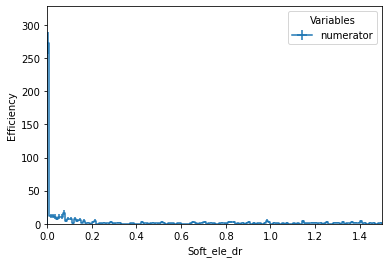

In [108]:
hist.plot1d(histo_dr_eff)

In [45]:
def makeroc(sig, bkg, binning, direction=1):
    '''Given a signal and background discriminant array, along with a binning,
    compute the ROC curve by integrating discriminant histograms along a direction:
        1: cut < value
        -1: cut >= value
    Returns a tuple of (signal efficiency, background efficiency)'''
    sighist, _ = np.histogram(sig, bins=binning)
    bkghist, _ = np.histogram(bkg, bins=binning)
    # numpy histogram will ignore values out of range of our binning (overflow)
    # so add the overflow values that would pass given our cut direction
    if direction == 1:
        sighist[0] += sum(sig < binning[0])
        bkghist[0] += sum(bkg < binning[0])
    elif direction == -1:
        sighist[-1] += sum(sig > binning[-1])
        bkghist[-1] += sum(bkg > binning[-1])
    else:
        raise ValueError("Invalid direction")
    sigpass = (np.cumsum(sighist[::direction]) / len(sig))[::direction]
    bkgpass = (np.cumsum(bkghist[::direction]) / len(bkg))[::direction]
    return (sigpass, bkgpass)


def cut(electrons):
    return electrons[
        (electrons.pt > 20)
        & (abs(electrons.eta) < 1.4)
    ]



In [18]:
#events.ElectronBPark

eles = events.ElectronBPark.cross(events.GenPart[events.GenPart.pdgId == 11], nested=True)
mask = (eles.i0.delta_r(eles.i1)).min() < 0.05

matched_electrons = events.ElectronBPark[mask].flatten()
unmatched_electrons = events.ElectronBPark[~mask].flatten()

roc_mva = makeroc(
    sig=cut(matched_electrons).mvaId,
    bkg=cut(unmatched_electrons).mvaId,
    binning=np.linspace(-10, 30, 80),
    direction=-1,
)

In [13]:
print(matched_electrons.pt)


[1.3984382 1.3395618 3.6656501 ... 2.5934784 2.5237772 1.335616 ]


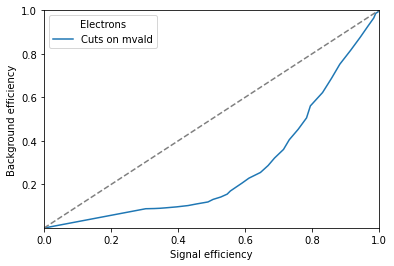

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(*roc_mva, label=r"Cuts on mvaId")
diag = np.linspace(0, 1, 100)
ax.plot(diag, diag, color='grey', linestyle='--')
ax.set_xlabel("Signal efficiency")
ax.set_ylabel("Background efficiency")
ax.set_xlim(0, 1)
ax.set_ylim(1e-3, 1)
# ax.set_yscale('log')
ax.legend(title=r'Electrons')

In [20]:
print(events.ElectronBPark.columns)

['dxy', 'dxyErr', 'dz', 'dzErr', 'eta', 'fBrem', 'ip3d', 'mass', 'mvaId', 'pfRelIso', 'pfmvaId', 'phi', 'pt', 'ptBiased', 'sip3d', 'trkRelIso', 'unBiased', 'vx', 'vy', 'vz', 'charge', 'pdgId', 'convVeto', 'isLowPt', 'isPF', 'isPFoverlap', 'genPartFlav', 'matched_jet', 'matched_gen', 'matched_photon']


In [16]:
histo = hist.Hist(
            "Events",
            hist.Cat("dataset", "Dataset"),
            hist.Bin("ele_pt", "electron pt", 20, 0, 20),
        )
#histo.Fill(eve)
num = hist.Hist(
            "Events",
            hist.Cat("dataset", "Dataset"),
            hist.Bin("ele_pt", "electron pt", 20, 0, 20),
        )

In [40]:
print(mask)

[ True False False ... False False False]


In [35]:
eles = events.ElectronBPark.cross(events.GenPart[events.GenPart.pdgId == 11])
mask = (eles.i0.delta_r(eles.i1)).min() < 0.05
histo.fill(dataset="test", ele_pt=events.ElectronBPark[mask].pt.flatten())
mask2 = mask & (events.ElectronBPark.pt > 5)
histo.fill(dataset="test2", ele_pt=events.ElectronBPark[mask2].pt.flatten())
num.fill(dataset="test", ele_pt=events.ElectronBPark[mask2].pt.flatten())

/uscms/home/ahall/nobackup/LPC-DM/SIDM/anaconda3/envs/FireHydrant/lib/python3.8/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)
/uscms/home/ahall/nobackup/LPC-DM/SIDM/anaconda3/envs/FireHydrant/lib/python3.8/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


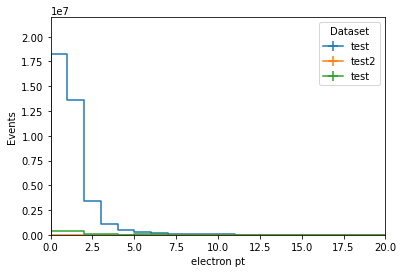

In [38]:
from coffea import hist
%matplotlib inline
hist.plot1d(histo)
hist.plot1d(num)
#hist.plotratio(num=num.integrate("dataset"), denom=histo.integrate("dataset"), error_opts={'marker':'x'})

/uscms/home/ahall/nobackup/LPC-DM/SIDM/anaconda3/envs/FireHydrant/lib/python3.8/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


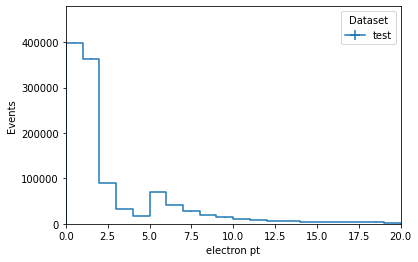

In [39]:
hist.plot1d(num)


In [7]:
events2.ElectronBPark?

Type:            NanoCollection
String form:     [[<ElectronBPark 0> <ElectronBPark 1> <ElectronBPark 2> ... <ElectronBPark 73> <ElectronBPark 74> <...> 42> <ElectronBPark 88043> ... <ElectronBPark 88103> <ElectronBPark 88104> <ElectronBPark 88105>]]
Length:          1108
File:            ~/nobackup/LPC-DM/SIDM/anaconda3/envs/FireHydrant/lib/python3.8/site-packages/coffea/nanoaod/nanoevents.py
Docstring:       slimmedElectrons for BPark after basic selection
Class docstring:
A NanoAOD collection

NanoAOD collections are collections of branches formed by name, where:

- one branch exists named ``name`` and no branches start with ``name_``, interpreted as a single flat array;
- one branch exists named ``name``, one named ``n{name}``, and no branches start with ``name_``, interpreted as a single jagged array;
- no branch exists named ``{name}`` and many branches start with ``name_*``, interpreted as a flat table; or
- one branch exists named ``n{name}`` and many branches start with ``name

In [12]:
events.columns

['run',
 'fixedGridRhoFastjetAll',
 'GenDressedLepton',
 'GenMET',
 'PSWeight',
 'Jet',
 'CorrT1METJet',
 'fixedGridRhoFastjetCentralCalo',
 'IsoTrack',
 'SoftActivityJetHT10',
 'SubGenJetAK8',
 'HLTriggerFinalPath',
 'ChsMET',
 'Tau',
 'SV',
 'GenJetAK8',
 'HLTriggerFirstPath',
 'ElectronBPark',
 'GenJet',
 'GenPart',
 'fixedGridRhoFastjetCentralNeutral',
 'MET',
 'genTtbarId',
 'FsrPhoton',
 'FatJet',
 'CaloMET',
 'SoftActivityJetHT',
 'PV',
 'SoftActivityJetNjets5',
 'Pileup',
 'SoftActivityJetHT5',
 'TkMET',
 'Flag',
 'Photon',
 'Generator',
 'Muon',
 'HTXS',
 'Electron',
 'btagWeight',
 'HLT',
 'L1simulation',
 'TrigObj',
 'SoftActivityJetNjets10',
 'L1Reco',
 'event',
 'RawMET',
 'GenModel',
 'OtherPV',
 'SoftActivityJetNjets2',
 'PuppiMET',
 'L1',
 'SoftActivityJetHT2',
 'SoftActivityJet',
 'GenVisTau',
 'SubJet',
 'genWeight',
 'fixedGridRhoFastjetCentralChargedPileUp',
 'fixedGridRhoFastjetCentral',
 'luminosityBlock']

In [23]:
events.MET.columns

['MetUnclustEnUpDeltaX',
 'MetUnclustEnUpDeltaY',
 'covXX',
 'covXY',
 'covYY',
 'phi',
 'pt',
 'significance',
 'sumEt',
 'fiducialGenPhi',
 'fiducialGenPt']

In [3]:
from coffea import hist

In [4]:
histo = hist.Hist(
            "Events",
            hist.Cat("dataset", "Dataset"),
            hist.Bin("ele_pt", "electron pt", 120, 0, 120),
        )
histi = hist.Hist(
            "Events",
            hist.Cat("dataset", "Dataset"),
            hist.Bin("met", "met", 10, 0, 2000),
        )

In [53]:
ele_mask = (events.Electron.pt > 30)
event_mask = events.Electron[ele_mask].counts >=2
histo.fill(dataset="SUSY",ele_pt=events.Electron.pt[event_mask].flatten())
histi.fill(dataset="SUSY",met=events.MET.pt.flatten())

/uscms/home/ahall/nobackup/LPC-DM/SIDM/anaconda3/envs/FireHydrant/lib/python3.8/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


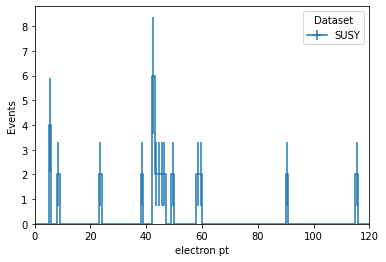

In [54]:
%matplotlib inline
hist.plot1d(histo)

/uscms/home/ahall/nobackup/LPC-DM/SIDM/anaconda3/envs/FireHydrant/lib/python3.8/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


(0.5, 1500)

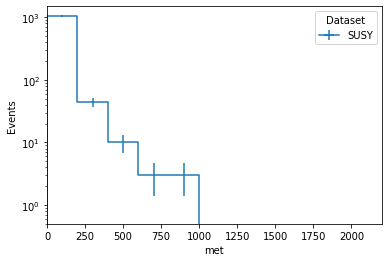

In [65]:
%matplotlib inline
ax = hist.plot1d(histi, overflow="over")
ax.set_yscale("log")
ax.set_ylim(0.5,1500)

In [51]:
histi.sum("met").values()

{('SUSY',): 7.0}

In [52]:
histo.sum("ele_pt").values()

{('SUSY',): 17.0}

In [ ]:
ax.set_y